In [108]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
file_path = "E:\\COMPUTER SCIENCE\\PRODIGY_INTERNSHIP\\TASK_4_Prodigy\\SA_CSV.csv"
data = pd.read_csv(file_path)

In [110]:
print("Shape of data(rows & columns): ",data.shape)

Shape of data(rows & columns):  (74682, 4)


In [111]:
#[include = object] is used to include non-numerical columns too. 
data.describe(include=object)

,Topic,Sentiment,Text
count,74682,74682,73996
unique,32,4,69489
top,TomClancysRainbowSix,Negative,
freq,2400,22542,172


In [112]:
#Fishing for unique values at 'Sentiment' column out of 74682 rows.
data['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

Null Values:

In [113]:
print("Checking for Null values:\n", data.isnull().sum(), "\n\n")
print("Dropping Null Values: ", data.dropna(inplace=True), "\n\n")
print("Checking for Null vales again:\n", data.isnull().sum(), "\n\nWe find null values have been successfully dropped")

Checking for Null values:
 ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64 


Dropping Null Values:  None 


Checking for Null vales again:
 ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64 

We find null values have been successfully dropped


Duplicate values:

In [114]:
print("Checking for Duplicate Values: ", data.duplicated().sum())
print(data.drop_duplicates(inplace=True))
print("Checking for Duplicate Values after dropping: ",data.duplicated().sum())

Checking for Duplicate Values:  2341
None
Checking for Duplicate Values after dropping:  0


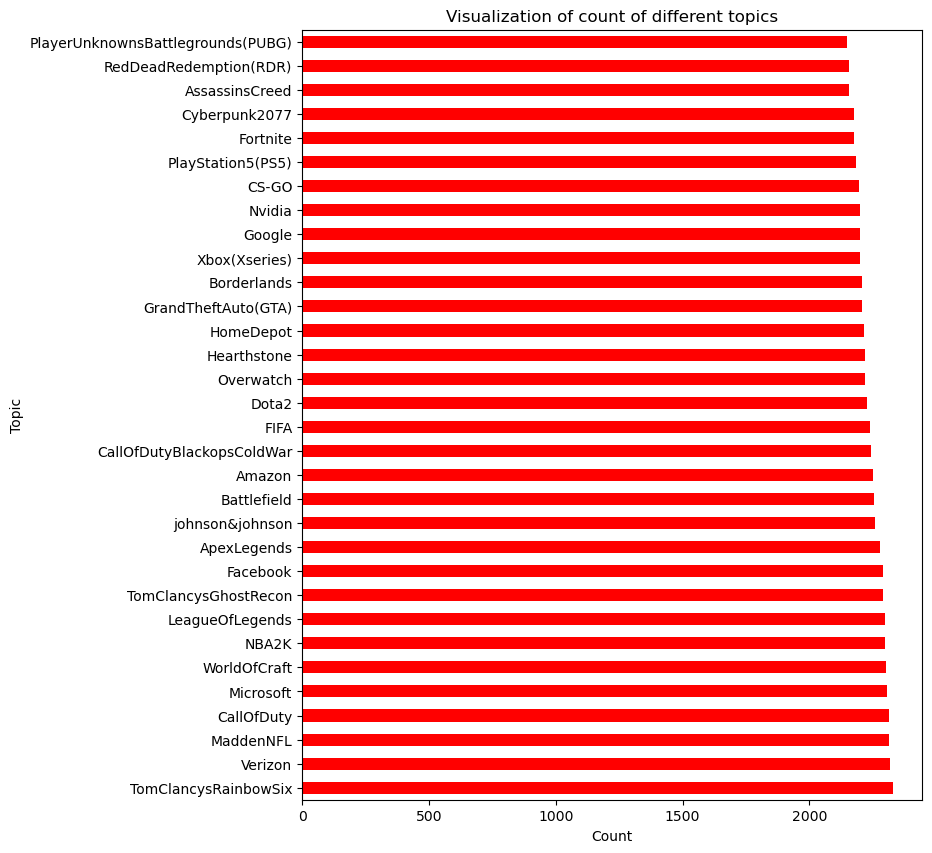

In [115]:
plt.figure(figsize=(8,10))
data['Topic'].value_counts().plot(kind='barh',color='r')
plt.title("Visualization of count of different topics")
plt.xlabel("Count")
plt.show()

C:\Users\Sathiadev.T.M\AppData\Local\Temp\ipykernel_4484\310575824.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Sentiment', data = data, palette = 'viridis')


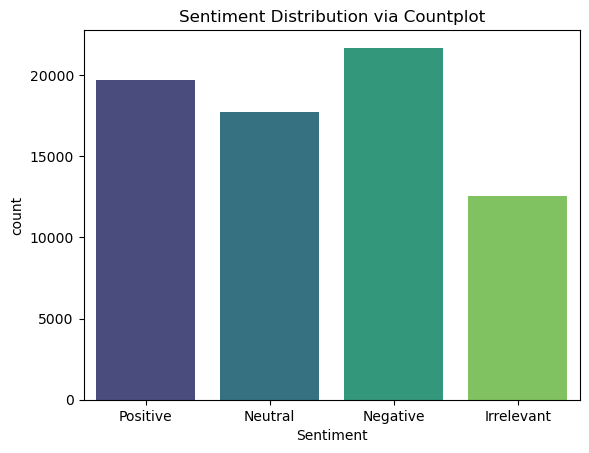

In [116]:
sns.countplot(x = 'Sentiment', data = data, palette = 'viridis')
plt.title("Sentiment Distribution via Countplot")
plt.show()

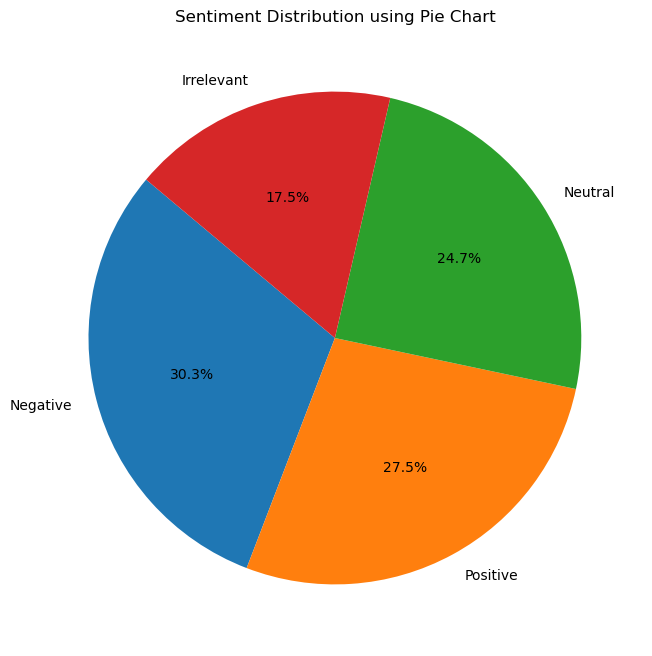

In [117]:
# Calculate the counts for each sentiment
sentiment_counts = data['Sentiment'].value_counts()
#Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels = sentiment_counts.index, autopct="%1.1f%%",
        startangle=140)
plt.title('Sentiment Distribution using Pie Chart')
plt.show()

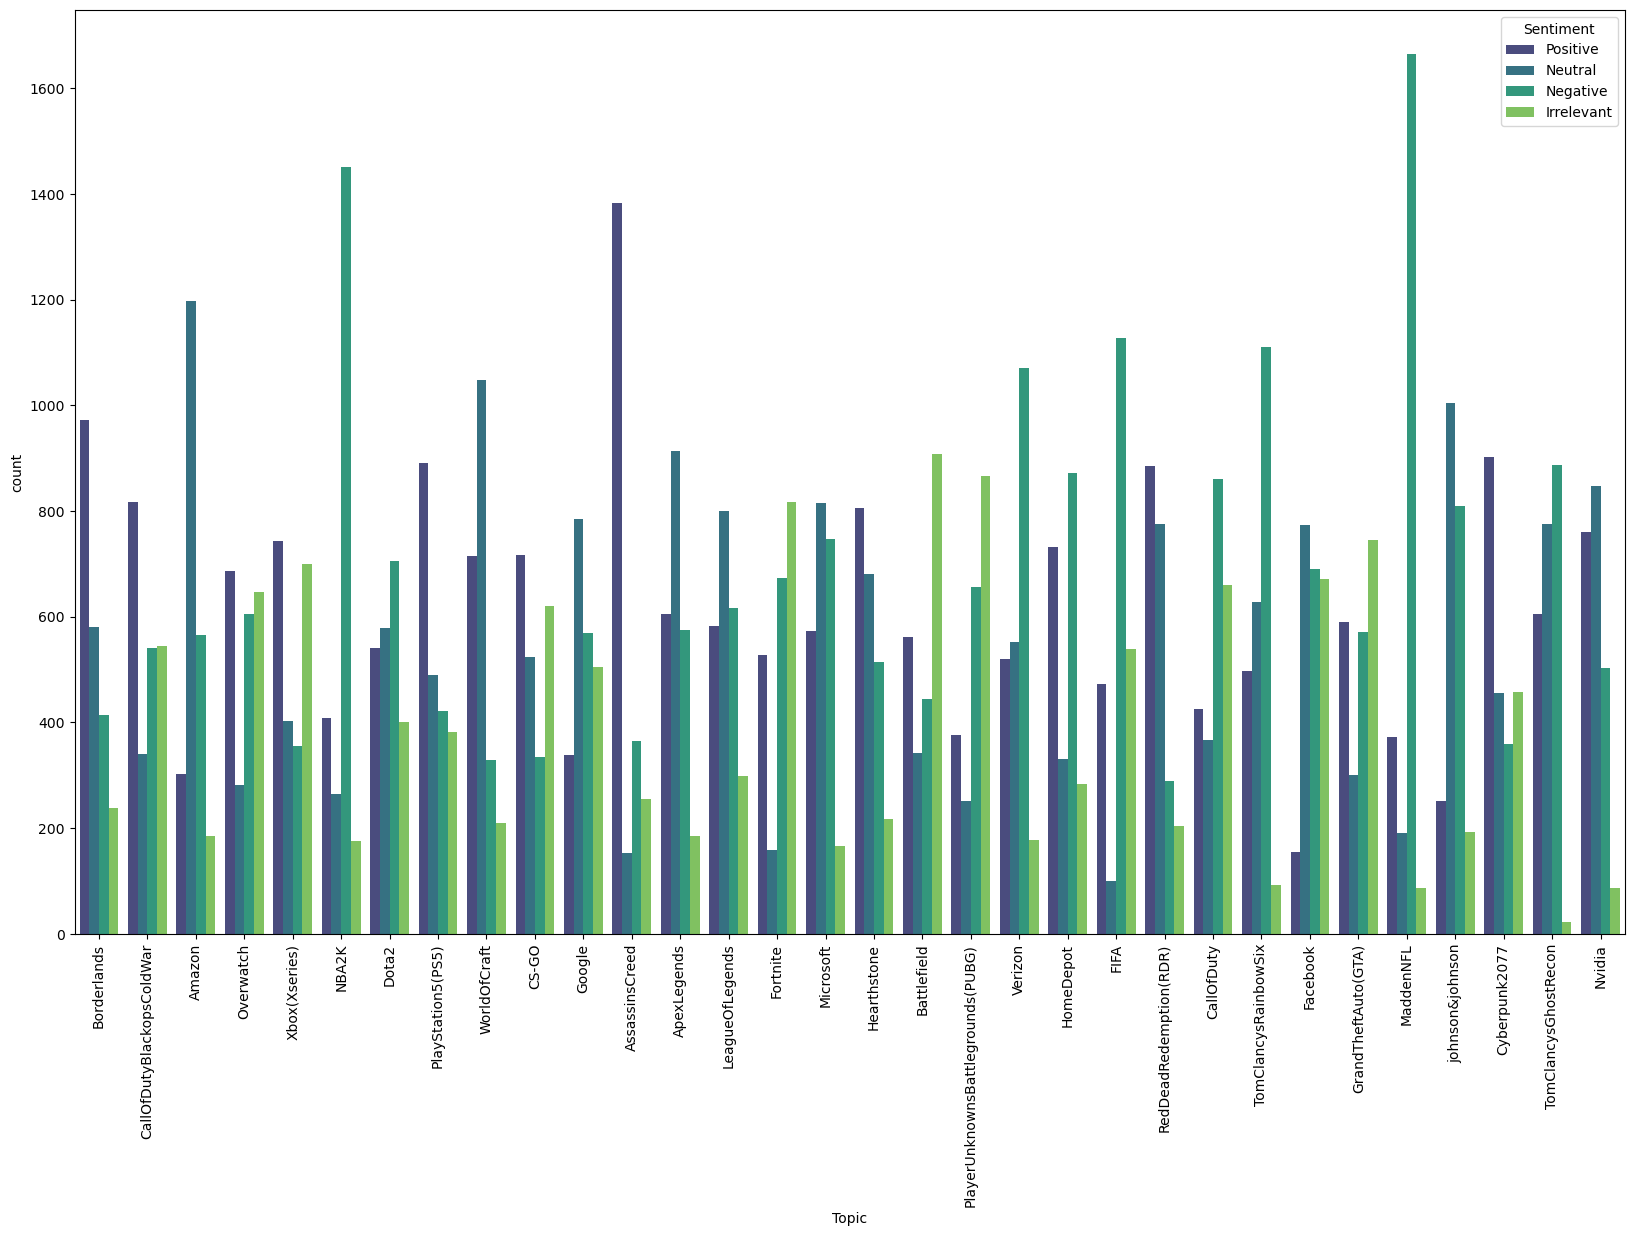

In [118]:
plt.figure(figsize=(20,12))
sns.countplot(x='Topic', data = data ,palette='viridis', hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

In [119]:
#Group by Topic and Sentiment
topic_wise_sentiment_analysis = data.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')
#topic_wise_sentiment as topic_wise_sentiment_analysis
topic_counts = data['Topic'].value_counts().nlargest(5).index
top_topics_sentiment_analysis = topic_wise_sentiment_analysis[topic_wise_sentiment_analysis['Topic'].isin(topic_counts)]

C:\Users\Sathiadev.T.M\AppData\Local\Temp\ipykernel_4484\2798095408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_topics_sentiment_analysis[top_topics_sentiment_analysis['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='Greens')


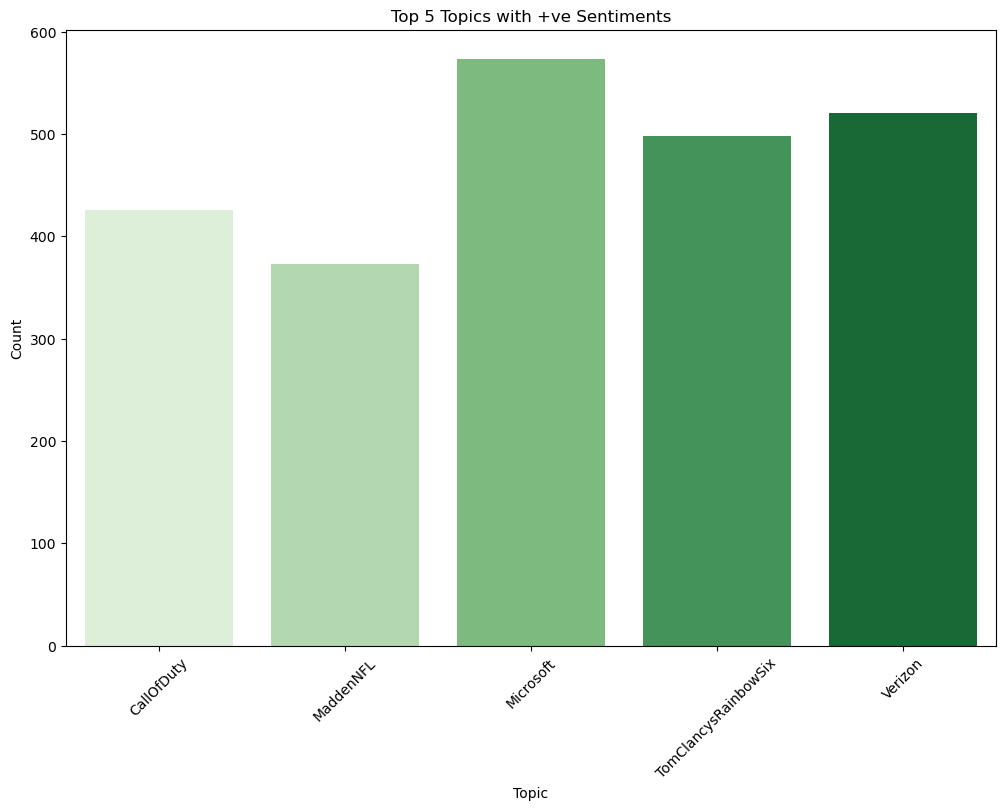

In [120]:
plt.figure(figsize=(12, 8))
sns.barplot(data = top_topics_sentiment_analysis[top_topics_sentiment_analysis['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='Greens')
plt.title('Top 5 Topics with +ve Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\Sathiadev.T.M\AppData\Local\Temp\ipykernel_4484\19844585.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment_analysis[top_topics_sentiment_analysis['Sentiment'] == 'Neutral'], x='Topic', y='Count', palette='Blues')


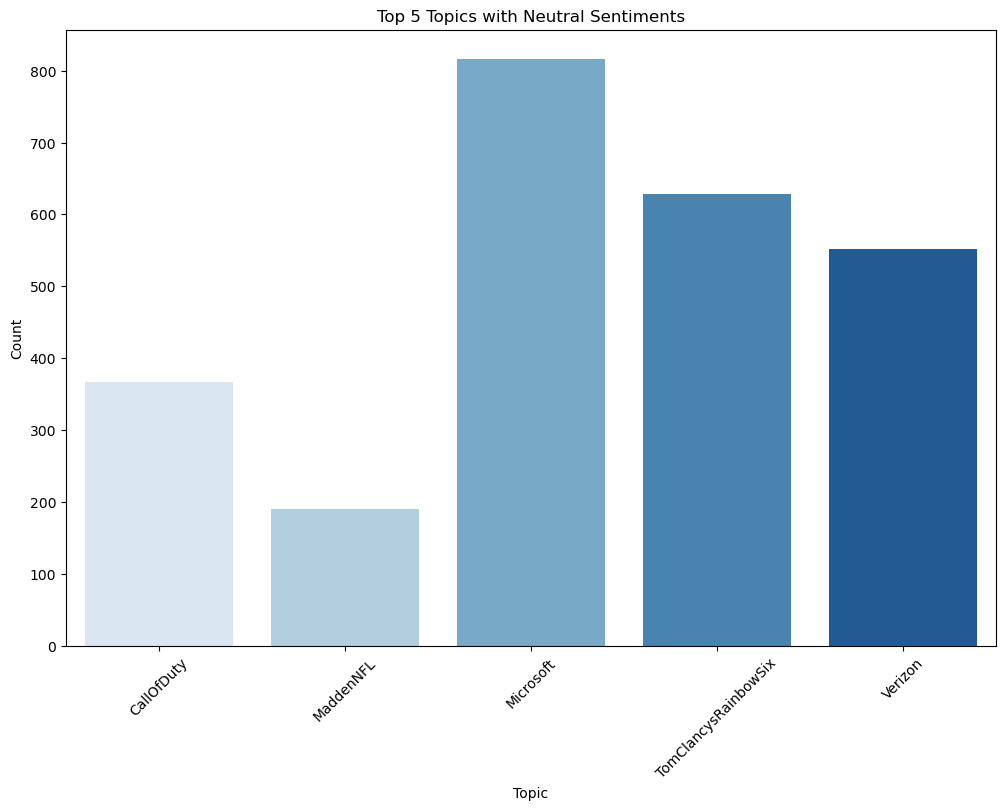

In [121]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment_analysis[top_topics_sentiment_analysis['Sentiment'] == 'Neutral'], x='Topic', y='Count', palette='Blues')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\Sathiadev.T.M\AppData\Local\Temp\ipykernel_4484\1805424780.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment_analysis[top_topics_sentiment_analysis['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='Purples')


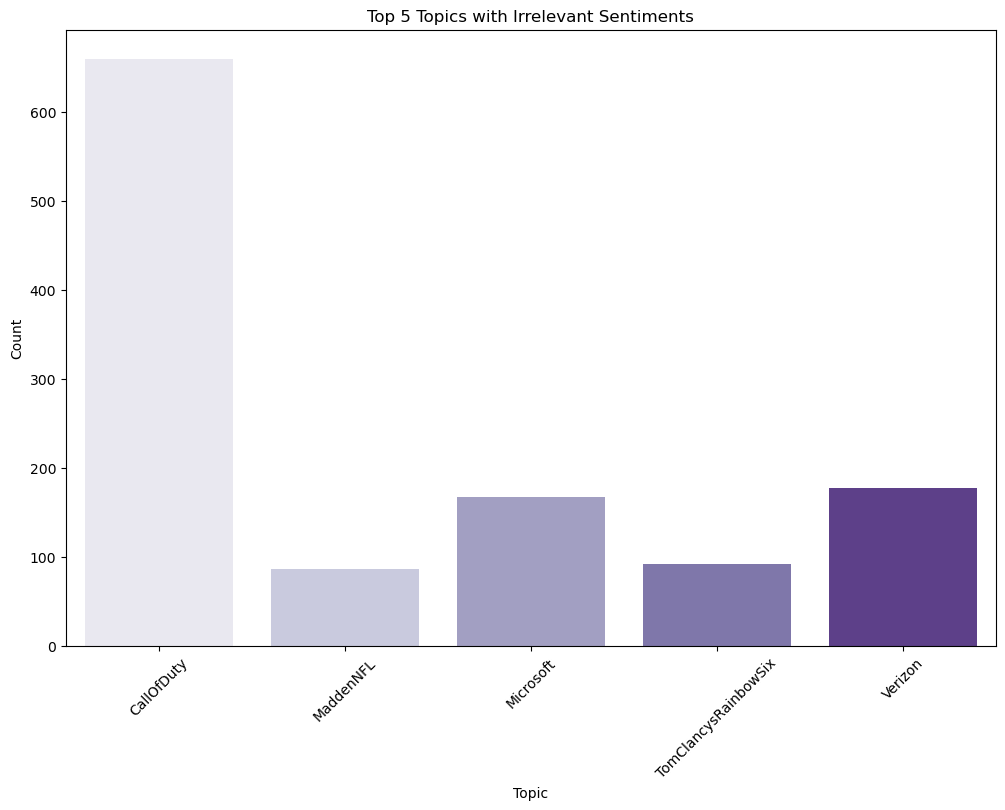

In [122]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment_analysis[top_topics_sentiment_analysis['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='Purples')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

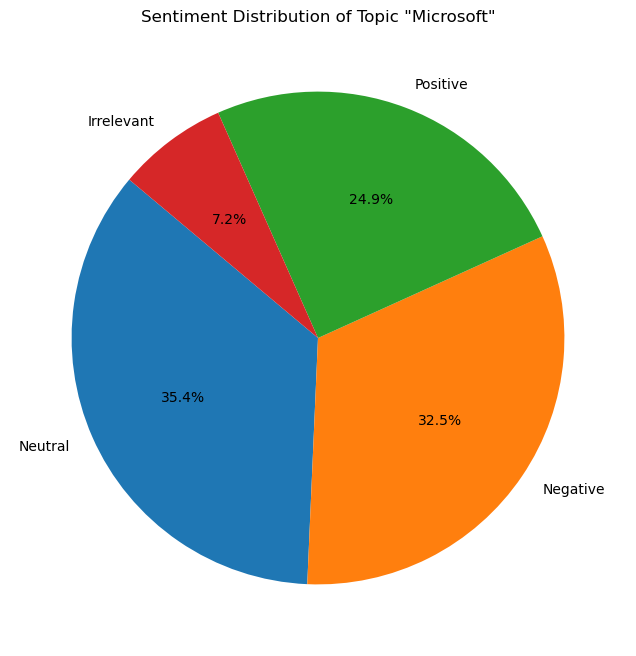

In [123]:
# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = data[data['Topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', 
        startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

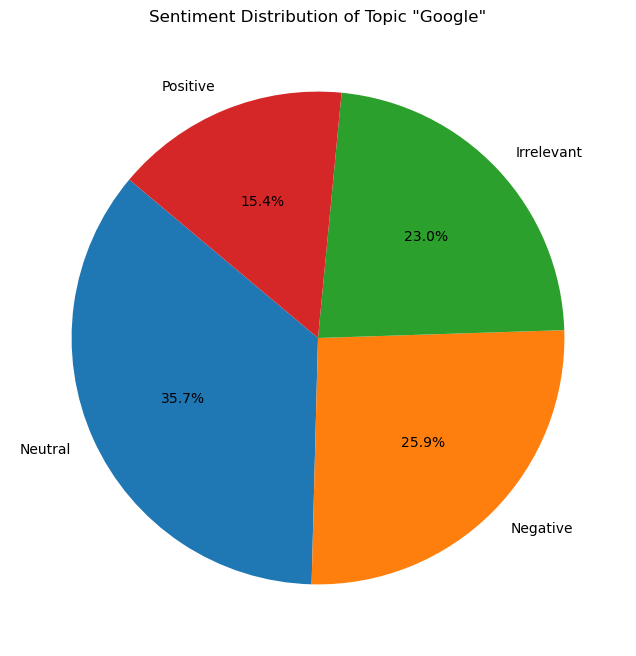

In [124]:
# Filter the dataset to include only entries related to the topic 'Google'
google_data = data[data['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels = sentiment_counts.index, autopct='%1.1f%%', 
        startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

In [125]:
data['msg_len'] = data['Text'].apply(len)
print("Checking length of comments:\n", data['msg_len'])

Checking length of comments:
 0         53
1         51
2         50
3         51
4         57
        ... 
74677    128
74678    117
74679    125
74680    159
74681    119
Name: msg_len, Length: 71655, dtype: int64


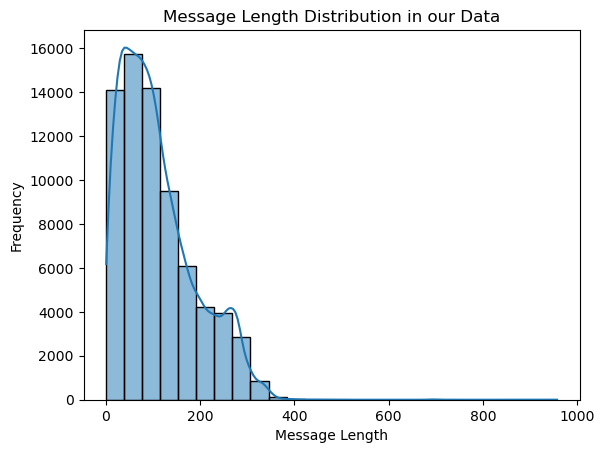

In [126]:
sns.histplot(data['msg_len'], bins=25, kde=True)
plt.title('Message Length Distribution in our Data')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

Lengths of message (in characters) are mostly between 0 to 400 after which there is a flat decline. But the range goes on till 1_000 characters.

C:\Users\Sathiadev.T.M\AppData\Local\Temp\ipykernel_4484\118028023.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, x = data['Sentiment'], y='msg_len',


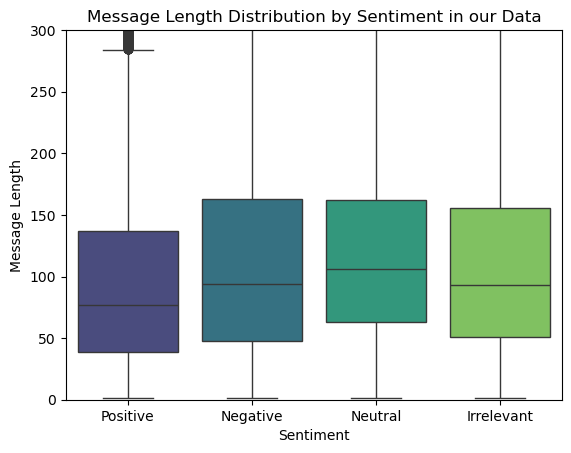

In [127]:
sns.boxplot(data = data, x = data['Sentiment'], y='msg_len', 
            palette='viridis', 
            order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution by Sentiment in our Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0,300)
plt.show()  

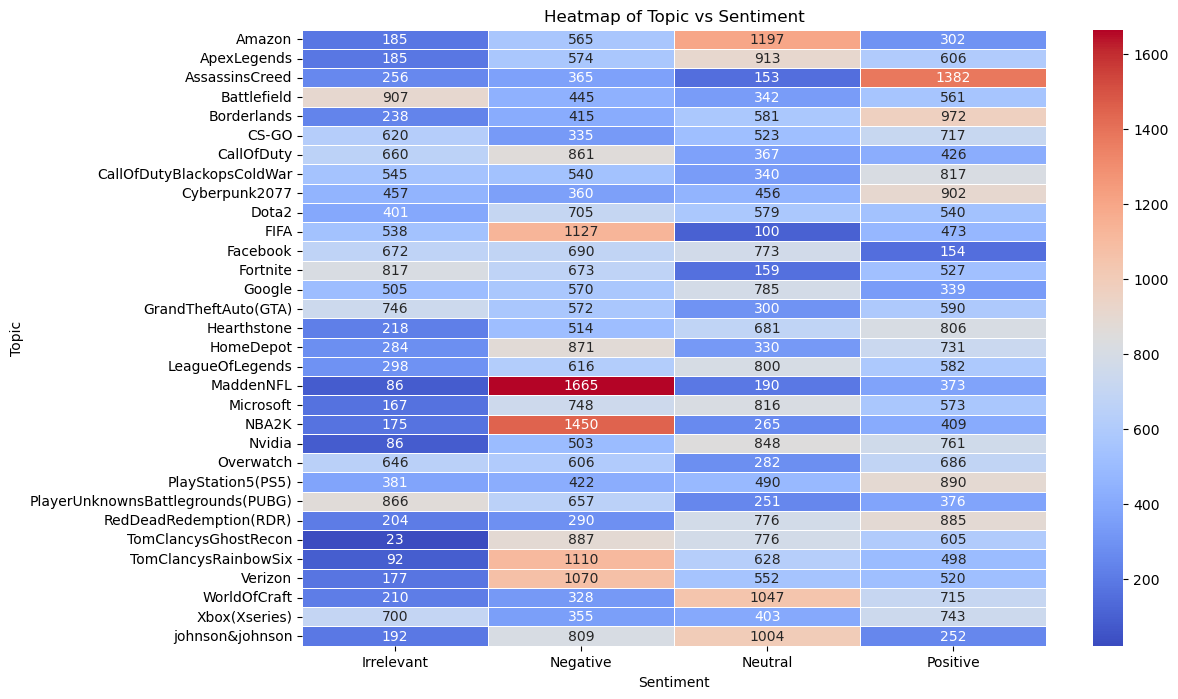

In [128]:
#Cross_Tab
crosstab = pd.crosstab(index = data['Topic'], columns = data['Sentiment'])
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')
plt.show()

Findings: 

"TomClancyRainbowSix" emerges as the most frequent topic of discussion among 
the analyzed Twitter data.

Negative sentiment, accounting for 30.3% of the sentiments observed.
Positive sentiment is the next most prevalent 27.5% of the sentiments. 
Neutral sentiment closely follows at 24.7%. 
[Indicating no much difference between Positive & Neutral.] 
Irrelevant sentiments lowest still occupies about 17.5%.

"Google" and "Microsoft" predominantly exhibit a neutral sentiment. They tend to be 
more balanced or impartial in nature.

Twitter users tend to convey their sentiments concisely and succinctly within 
the platform's character limit.

In conclusion, our model sentiment analysis provides valuable insights into the 
prevailing attitudes and opinions within the Twitter community regarding various 
topics. While negative sentiments appear to be more common overall, there is a 
diverse range of sentiments expressed across different topics.